#### Skills of science inquiry in projects’ descriptions

In [ ]:
# pandas and numpy for reading and manipulating the data
import pandas as pd
import numpy as np

# matplotlib and seaborn for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

#language processing
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# read the dataset
training = pd.read_csv('/content/drive/Shareddrives/TIDE CS-Track (interna)/D2.2/to-github-skills/github/dataTraining.csv')

In [ ]:
# basic stats about the data
#training.info()

In [ ]:
training['category_index'].value_counts() 

0    183
1    178
Name: category_index, dtype: int64

#### Q1:  What types of science inquiry skills CS projects promote?

In [ ]:
#only positive subset
onlyPositive = training.loc[training['category_index'] == 1]


# Use English stemmer
stemmer = SnowballStemmer("english")


# Split the sentences to lists of words.
onlyPositive['unstemmed'] = onlyPositive['sentences'].str.split()

# Stem every word.
onlyPositive['stemmed'] = onlyPositive['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x]) 

# Get rid of the unstemmed column.
onlyPositive = onlyPositive.drop(columns=['unstemmed']) 

#remove stop words
nltk.download('stopwords')
stop = stopwords.words('english')
onlyPositive['stop'] = onlyPositive['stemmed'].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#onlyPositive.to_csv('onlyPositive.csv')

selected_words_after_stemming=['collect','search','record','identify','observ','find','count','enter','note','transcrib','share','answer','locat','discuss','analys','insert','comment','measurements'] 

len(selected_words_after_stemming)

18

In [ ]:
#how many times each skill appear in each project description
titles =  len(onlyPositive.axes[0])
df_all = []
df_stats = {}

for i in range(0,titles):
  splited_words = onlyPositive['stop'].iloc[i]
  df2 = pd.DataFrame(splited_words,columns=[onlyPositive['title'].iloc[i]])
  df_all.append(df2)
  
#print(df_all[55])

In [ ]:
for df in df_all:
  df_col_name = df.columns.values.tolist()[0]
  outDict = {}
  #print(df[column_name])
  for word in selected_words_after_stemming:
    outDict[word] = df[df_col_name].str.contains(word).sum()
  df_stats[df_col_name] = outDict

In [ ]:
finalCounts = pd.DataFrame.from_dict(df_stats) 
finalCounts.to_csv ('specWordCount.csv', index = True, header=True)

In [ ]:
calc = pd.read_csv("/content/specWordCount.csv") 
calc["sum"] = calc.sum(axis=1)
calc.to_csv('specWordSum.csv',  header=True) 
#calc.head()

In [ ]:
#copy calc to df2 except 1st column
df2 = calc.iloc[:,1:] 

#drop sum column
df2.drop('sum', axis=1, inplace=True) 

#replace any value greater than 0 to 1 to indicate the presence of skills in projects
df2[df2 > 0] = 1 

#add skills column back
skills = calc['Unnamed: 0'] 
df2 = df2.join(skills)
df2.rename(columns = {'Unnamed: 0':'Keywords'}, inplace = True)

df2["project_count"] = df2.sum(axis=1)

# Select last 2 columns to plot
requiredData = df2.iloc[:,-2:]

# String matching for "fill out" and "come up with"
fill_out = onlyPositive[onlyPositive['sentences'].str.contains('fill out', regex=False, case=False)] #case=False - irrespective of the case 
come_up_with = onlyPositive[onlyPositive['sentences'].str.contains('come up with', regex=False, case=False)] #case=False - irrespective of the case 

#appearence of fill out in project descriptions
fill_out.sentences.str.count("fill out")
fill = fill_out['sentences'].str.count('fill out').sum()

#appearence of come up with in project descriptions
come_up_with.sentences.str.count("come up with")
come_up_with['sentences'].str.count('come up with').sum()

#define second DataFrame
new = pd.DataFrame({'Keywords': ['fill out', 'come up with'],
                    'project_count': [2, 1]})

#add new row to end of DataFrame
requiredData = requiredData.append(new, ignore_index = True)

#sort count descending before putting to graph

requiredData = requiredData.sort_values(by='project_count', ascending=False)
requiredData

# Declare a list with complete name of the skill
spelling = ['Observe', 'Search', 'Collect', 'Find', 'Analyse', 'Discuss', 'Record', 'Locate', 'Share', 'Count',  'Transcribe', 'Note', 'Enter', 'Answer', 'Fill out', 'Identify', 'Insert' ,'Measurements', 'Come up with', 'Comment']
requiredData['Full_Keyword'] = spelling


Distribution of keywords in the training data

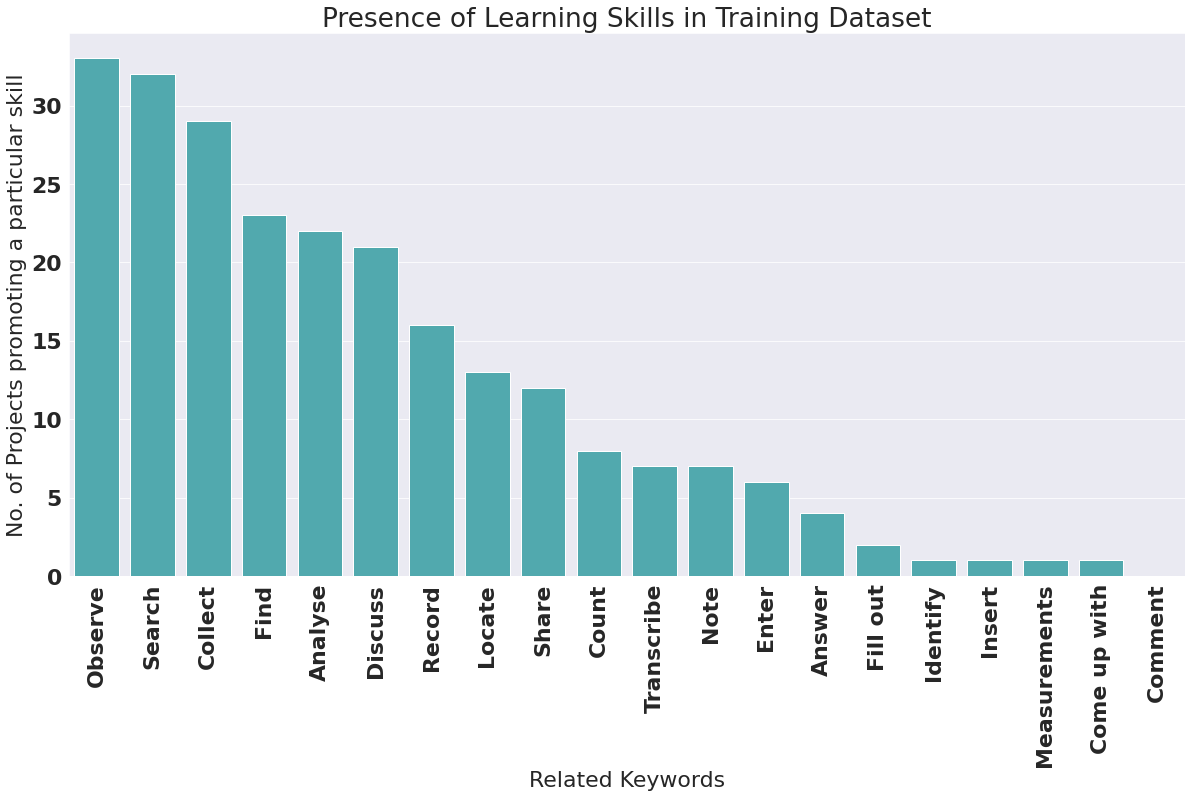

In [ ]:
#plot
plt.rcParams["figure.figsize"] = [20, 10]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

sns.set_style('darkgrid')

labels = requiredData.Full_Keyword

ax = sns.barplot(x=requiredData.Full_Keyword, y=requiredData.project_count,color='#42b7bd') 

ax.set_xticklabels(labels, rotation=90, horizontalalignment="center")

plt.title("Presence of Learning Skills in Training Dataset")
ax.set_xlabel("Related Keywords")
ax.set_ylabel("No. of Projects promoting a particular skill")

plt.savefig('training-skills.png', bbox_inches='tight')

In [ ]:
#reading the file with prediction results
byText = pd.read_csv("/content/drive/Shareddrives/TIDE CS-Track (interna)/D2.2/to-github-skills/github/finalClassbyTextSimple21.csv")

# basic stats about the data
#byText.info()

In [ ]:
byText['category_index'].value_counts()*100/len(byText) # 85% for 0 and 15% for 1

0    84.918478
1    15.081522
Name: category_index, dtype: float64

In [ ]:
#only positive subset for presenting results
onlyPositive = byText.loc[byText['category_index'] == 1]

We decided to remove the following from the dataset (that was not in english or didn't had a description)

- 별이 빛나는 Eco-City

- Flying Fox Monitoring Project

- DO NOT USE - Draft Monitoring Nesting Behaviour - Coastal Raptor Nests in Redland City

- Monitoring Nesting Behaviour - Coastal Raptor Nests in Redland City

- Downeast Maine Shellfish Sustainability Project

In [ ]:
# filtering the rows 
onlyPositive[onlyPositive['Title'].str.contains('별이 빛나는 Eco-City')]

,Unnamed: 0,Title,sentences,category_index
184,184,별이 빛나는 Eco-City,"[""빛공해의 심각성을 인지하기 위해 밤하늘의 별자리가 얼마나 보이는지 관측하고 밤에...",1


In [ ]:
onlyPositive.drop(onlyPositive[onlyPositive['Unnamed: 0'] == 184].index, inplace = True)

In [ ]:
onlyPositive[onlyPositive['Title'].str.contains('Flying Fox Monitoring Project')]

,Unnamed: 0,Title,sentences,category_index
459,460,Flying Fox Monitoring Project,"[""a""]",1


In [ ]:
onlyPositive.drop(onlyPositive[onlyPositive['Unnamed: 0'] == 460].index, inplace = True)

In [ ]:
onlyPositive[onlyPositive['Title'].str.contains('DO NOT USE - Draft Monitoring Nesting Behaviour - Coastal Raptor Nests in Redland City')]

,Unnamed: 0,Title,sentences,category_index
592,593,DO NOT USE - Draft Monitoring Nesting Behaviou...,"[""Null""]",1


In [ ]:
onlyPositive.drop(onlyPositive[onlyPositive['Unnamed: 0'] == 593].index, inplace = True)

In [ ]:
onlyPositive[onlyPositive['Title'].str.contains('Monitoring Nesting Behaviour - Coastal Raptor Nests in Redland City')]

,Unnamed: 0,Title,sentences,category_index
1311,1312,Monitoring Nesting Behaviour - Coastal Raptor ...,"[""Null""]",1


In [ ]:
onlyPositive.drop(onlyPositive[onlyPositive['Unnamed: 0'] == 1312].index, inplace = True)

In [ ]:
onlyPositive[onlyPositive['Title'].str.contains('Downeast Maine Shellfish Sustainability Project')]

,Unnamed: 0,Title,sentences,category_index
2757,2759,Downeast Maine Shellfish Sustainability Project,[],1


In [ ]:
onlyPositive.drop(onlyPositive[onlyPositive['Unnamed: 0'] == 2759].index, inplace = True)

In [ ]:
#processing project descriptions



# Use English stemmer
stemmer = SnowballStemmer("english")

# Split the sentences to lists of words.
onlyPositive['unstemmed'] = onlyPositive['sentences'].str.split()

# Stem every word.
onlyPositive['stemmed'] = onlyPositive['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x]) 

onlyPositive = onlyPositive.drop(columns=['unstemmed']) 

#onlyPositive.head()

onlyPositive['stop'] = onlyPositive['stemmed'].apply(lambda x: [item for item in x if item not in stop])

#onlyPositive.to_csv('all.csv')

selected_words_after_stemming=['collect','search','record','identify','observ','find','count','enter','note','transcrib','share','answer','locat','discuss','analys','insert','comment','measurements'] 
#len(selected_words_after_stemming)

In [ ]:
#Create a summary of learning skills mentioned in each project description (positive sample)

titles =  len(onlyPositive.axes[0])
df_all = []
df_stats = {}

import pandas as pd

#output = {}

for i in range(0,titles):
  splited_words = onlyPositive['stop'].iloc[i]
  df2 = pd.DataFrame(splited_words,columns=[onlyPositive['Title'].iloc[i]])
  df_all.append(df2)
  
#print(df_all[55])

In [ ]:
for df in df_all:
  df_col_name = df.columns.values.tolist()[0]
  outDict = {}
  #print(df[column_name])
  for word in selected_words_after_stemming:
    outDict[word] = df[df_col_name].str.contains(word).sum()
  df_stats[df_col_name] = outDict

In [ ]:
finalCounts = pd.DataFrame.from_dict(df_stats) 
finalCounts.to_csv ('resultsCount.csv', index = True, header=True)

In [ ]:
calc = pd.read_csv("/content/resultsCount.csv") 

calc.rename(columns = {'Unnamed: 0':'keyWords'}, inplace = True)

calc['keyWords'].shape

(18,)

In [ ]:
#copy calc to df2 except 1st column
df2 = calc.iloc[:,1:] 

#replace any value greater than 0 to 1 and count
df2[df2 > 0] = 1 

#add skills column back
skills = calc['keyWords'] 
df2 = df2.join(skills)

#count number of projects with skills
df2["project_count"] = df2.sum(axis=1)

#df2.head()

In [ ]:
# Select last 2 columns to plot
requiredData = df2.iloc[:,-2:]

In [ ]:
fill_out = onlyPositive[onlyPositive['sentences'].str.contains('fill out', regex=False, case=False)] #case=False - irrespective of the case 

come_up_with = onlyPositive[onlyPositive['sentences'].str.contains('come up with', regex=False, case=False)] #case=False - irrespective of the case 

In [ ]:
#appearence of fill out in project descriptions
fill_out.sentences.str.count("fill out")

#projects with fill out

# 199 -  Bird Cams Lab
# 254 -  The Manta Rays of Kona Hawaii
# 812 -  Target Asteroids!
# 1092 -  The Great Sunflower Project
# 1352   - Volunteer Monthly Monitoring
# 1467   - Nature's Notebook
# 1506    - Discover Earth
# 2715    - Triangle Bird Count
# 2839    - NC State FW221_Spring2021

fill = fill_out['sentences'].str.count('fill out').sum()
fill

9

In [ ]:
#appearence of come up with in project descriptions
come_up_with.sentences.str.count("come up with")

#number of projets - come up with
come_up_with['sentences'].str.count('come up with').sum()

1

In [ ]:
#define second DataFrame
new = pd.DataFrame({'keyWords': ['fill out', 'come up with'],
                    'project_count': [9, 1]})

#add new row to end of DataFrame
requiredData = requiredData.append(new, ignore_index = True)

#requiredData.to_csv('db_classify.csv')

In [ ]:
requiredData = requiredData.sort_values(by='project_count', ascending=False)

# Declare a list with complete name of the skill
spelling = ['Collect', 'Search', 'Observe', 'Find', 'Record', 'Count', 'Locate', 'Share', 'Analyse',  'Enter', 'Answer', 'Note', 'Discuss', 'Fill out', 'Comment', 'Transcribe' ,'Identify', 'Measurements', 'Insert','Come up with']
requiredData['Full_Keyword'] = spelling

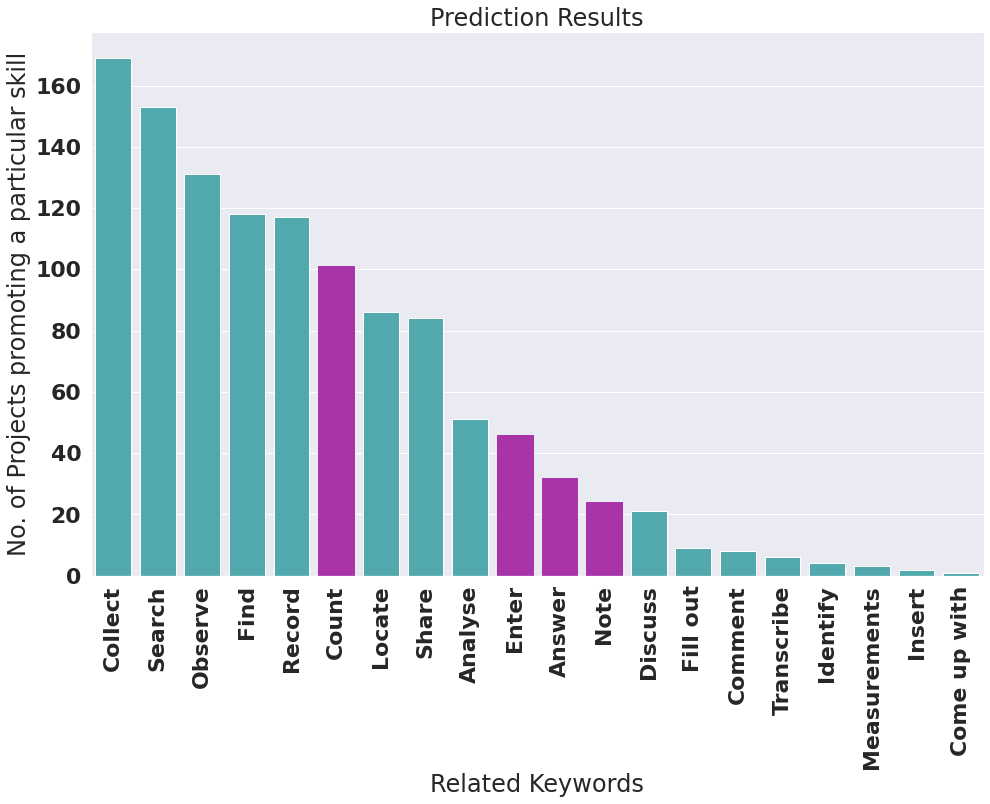

In [ ]:
sns.set_style("darkgrid")

sns.set(font_scale=2)

plt.rcParams["figure.figsize"] = (16,10)

labels = requiredData.Full_Keyword

ax = sns.barplot(x=requiredData.Full_Keyword, y=requiredData.project_count, color='#42b7bd') 

ax.set_xticklabels(labels, rotation=90, horizontalalignment="center")

plt.title("Prediction Results")
ax.set_xlabel("Related Keywords")
ax.set_ylabel("No. of Projects promoting a particular skill")

sns.set_color_codes('muted')

for bar in ax.patches:
    if bar.get_height() == 101: #count
        bar.set_color('#a834a8')    
    if bar.get_height() == 46:    #enter
        bar.set_color('#a834a8')
    if bar.get_height() == 32:    #answer
        bar.set_color('#a834a8')
    if bar.get_height() == 24:   #note
        bar.set_color('#a834a8')


#### Q2: What is the distribution of skills in CS Platforms?**

In [ ]:
#read data with platform details
data = pd.read_csv('/content/drive/Shareddrives/TIDE CS-Track (interna)/D2.2/to-github-skills/cluster_projects.csv')
data

,No,Platform,Project,collect,search,record,identify,observ,find,count,...,share,answer,locat,discuss,analys,insert,comment,measurements,fill out,come up with
0,1,Zooniverse,MATURITY OF BABY SOUNDS,0,1,1,0,0,1,1,...,0,1,1,0,0,0,0,0,0,0
1,2,cienciacidadapt,PLANT LETTERS,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2,Zooniverse,PLANT LETTERS,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,Zooniverse,CEDAR CREEK: EYES ON THE WILD,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
4,4,Zooniverse,SNAPSHOT HOGE VELUWE,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,434,Scistarter,Crowdsourcing Cures,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,435,Scistarter,crea.blender SDG,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453,436,Scistarter,NYBG Virtual Herbarium Expeditions,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
454,437,inrae,Tree Bodyguards,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Selected list of Platforms: Platform ID, Name

+ 13 - Zooniverse
+ 17 - EU citizen science
+ 1- Citizen Science Vlaanderen
+ 6 - Ciencia Ciudadana España
+ 10 - Schweiz forscht


In [ ]:
# skills assignment zooniverse 
Zooniverse = data[data['Platform'] == 'Zooniverse'] 

# count
Zooniverse.iloc[:, 3:24].sum(axis=0)

collect          9
search          14
record           7
identify         1
observ           8
find            12
count            9
enter            3
note             6
transcrib        2
share            4
answer           7
locat            6
discuss          2
analys           6
insert           0
comment          1
measurements     0
fill out         0
come up with     0
dtype: int64

In [ ]:
# skills assignment EU citizen science 
EU = data[data['Platform'] == 'EUCitizenScience'] 
EU.iloc[:, 3:24].sum(axis=0)

collect         21
search          14
record          11
identify         0
observ          15
find             4
count            5
enter            4
note             2
transcrib        2
share           10
answer           2
locat            9
discuss          2
analys           4
insert           1
comment          0
measurements     0
fill out         0
come up with     0
dtype: int64

In [ ]:
# skills assignment Vlaanderen
Vlaanderen = data[data['Platform'] == 'Scivil'] 
Vlaanderen.iloc[:, 3:24].sum(axis=0)

collect         0
search          1
record          0
identify        0
observ          0
find            0
count           0
enter           0
note            0
transcrib       0
share           0
answer          1
locat           0
discuss         1
analys          1
insert          0
comment         0
measurements    0
fill out        0
come up with    0
dtype: int64

In [ ]:
# skills assignment Ciencia Ciudadana España
Ciencia = data[data['Platform'] == 'Ciencia Ciudadana España'] 
Ciencia

,No,Platform,Project,collect,search,record,identify,observ,find,count,...,share,answer,locat,discuss,analys,insert,comment,measurements,fill out,come up with


In [ ]:
# skills area assignment Schweiz forscht
Schweiz = data[data['Platform'] == 'Schweiz forscht'] 
Schweiz

,No,Platform,Project,collect,search,record,identify,observ,find,count,...,share,answer,locat,discuss,analys,insert,comment,measurements,fill out,come up with
